<a href="https://colab.research.google.com/github/RonaldBH/Ruben-Ronald-Bautista-Huillca/blob/main/Clasificacion_de_Sentimientos_Bautista_Huillca_Ruben_Ronald_184641.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Clasificación de Tweets de Covid 19 (Análisis de Sentimientos)
#Estudiante : Ruben Ronald Bautista Huillca


<hr>


## Carga de Datos



In [ ]:
import pandas as pd
# LECTURA DE LOS DATA SET DE TRAIN Y TEST
DataSet_Train = pd.read_csv('Corona_NLP_train.csv',sep=',',encoding = "ISO-8859-1")
DataSet_Test = pd.read_csv('Corona_NLP_test.csv',sep=',',encoding = "ISO-8859-1")
DataSet_Train.head(10)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [ ]:
# ELIMINAMOS LAS COLUMNAS INNECESARIAS DEL TRAIN
DataSet_Train_Drop = DataSet_Train.drop(['UserName','ScreenName','Location','TweetAt'], axis=1)
DataSet_Train_Drop

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
# ELIMINAMOS LAS COLUMNAS INNECESARIAS DEL TEST
DataSet_Test_Drop = DataSet_Test.drop(['UserName','ScreenName','Location','TweetAt'], axis=1)
DataSet_Test_Drop

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


<hr>


## Normalización



In [ ]:
!python -m spacy download en_core_web_sm

2022-08-26 19:18:28.188596: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

from tqdm import tqdm

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Modulo de Normalizacion
def normalize(sentenses):
    """normalizamos la lista de frases y devolvemos la misma lista de frases normalizada"""
    for index, sentense in enumerate(tqdm(sentenses)):
        sentense = nlp(sentense.lower()) # Paso la frase a minúsculas y a un objeto de la clase Doc de Spacy
        sentenses[index] = " ".join([word.lemma_ for word in sentense if (not word.is_punct)
                                     and (len(word.text) > 2) and (not word.is_stop)
                                     and (not word.text.startswith('http'))])
    return sentenses

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Divido los datos en dos listas
#     X: Los OriginalTweets
#     y: TARGET (Etiquetas)

# NORMALIZACION PARA EL DATA SET DEL TRAIN
OriginalTweets_Train = [tuple(x) for x in DataSet_Train_Drop.values]
OriginalTweets_Test = [tuple(x) for x in DataSet_Test_Drop.values]

# Train
X_train = [doc[0] for doc in OriginalTweets_Train[:20000]]
y_train = [doc[1] for doc in OriginalTweets_Train[:20000]]

# Test
X_test = [doc[0] for doc in OriginalTweets_Test]
y_test = [doc[1] for doc in OriginalTweets_Test]

# Normalizamos las frases del train y test
X_train = normalize(X_train)
X_test = normalize(X_test)

100%|██████████| 3798/3798 [00:48<00:00, 78.88it/s]


<hr>


## Bolsa de Palabras



In [ ]:
# TODO
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, min_df=3)

# Pasamos los tweets normalizados a Bolsa de palabras
train_X = tfidf.fit_transform(X_train)
test_X = tfidf.fit_transform(X_test)


<hr>


## Creacción del Modelo


In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

mnb = MultinomialNB()

clasificadores = {'Multinomial Naive Bayes': mnb}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k,v in clasificadores.items():
    print('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(train_X,y_train)
    accuracy_train = v.score(train_X, y_train)
    print('\tAccuracy Train: {acc_train}'.format(acc_train=accuracy_train))

CREANDO MODELO: Multinomial Naive Bayes
	Accuracy Train: 0.49855


<hr>


## Evaluación del Modelo



In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
    Función de devuelve en un diccionario las métricas de evaluación de
    Accuracy, Precision, Recall y F1 para los conjuntos de datos de entrenamiento y test
        model: modelo a evaluar
        name: nombre del modelo
        X_train: Variables de entrada del conjunto de datos de entrenamiento
        y_train: Variable de salida del conjunto de datos de entrenamiento
        X_test: Variables de entrada del conjunto de datos de test
        y_test: Variable de salida del conjunto de datos de test
        return: diccionario con el nombre del modelo y el valor de las métricas
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key,
                                 X_train=train_X, y_train=y_train,
                                 X_test=test_X, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
results = pd.DataFrame.from_dict(evaluacion)
results.set_index("name", inplace=True)
results

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Multinomial Naive Bayes,0.49855,0.256714,0.571945,0.217399,0.49855,0.256714,0.483833,0.209301


## Interpretación de Resultados

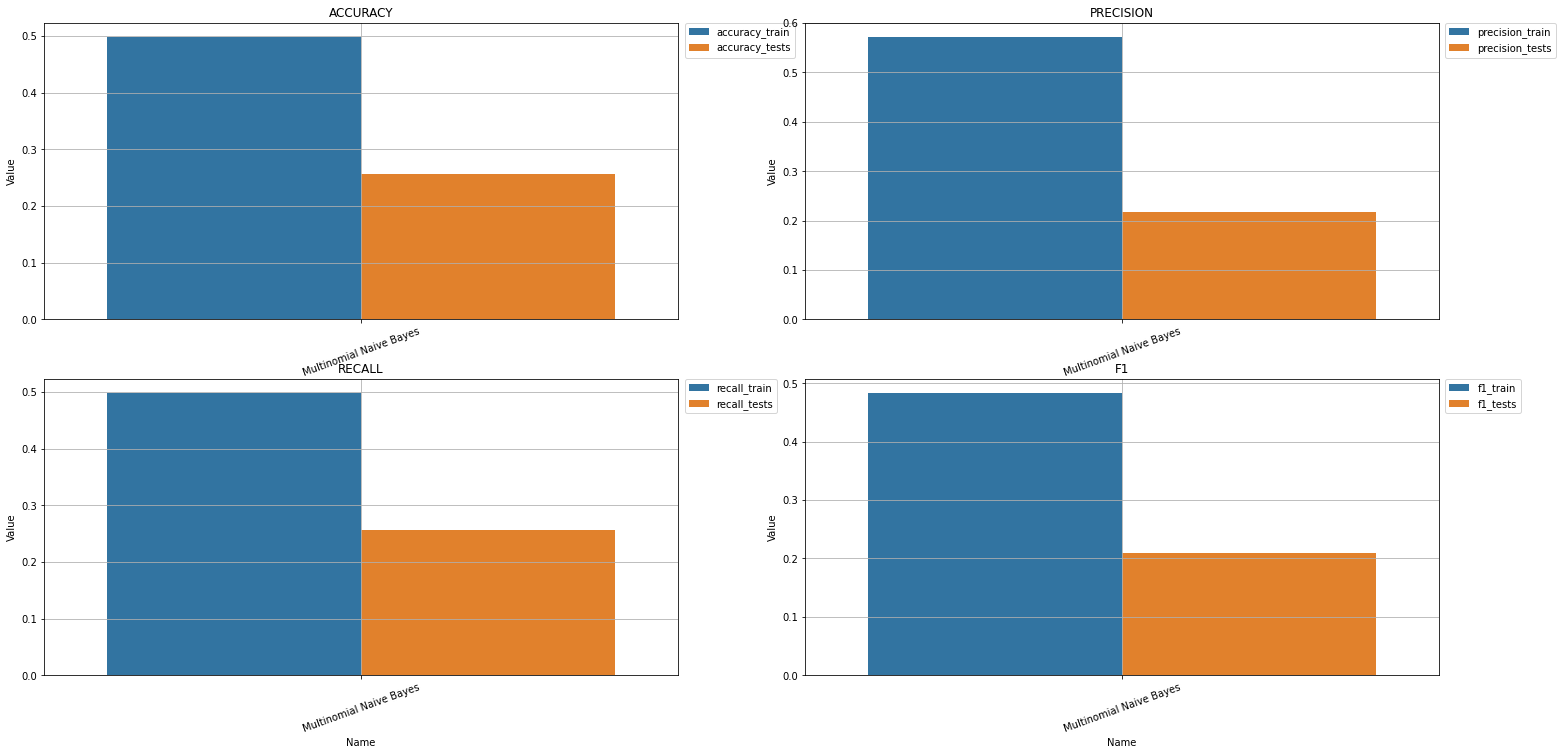

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = results.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]

    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

Obteniendo Matriz de Confusión de: Multinomial Naive Bayes


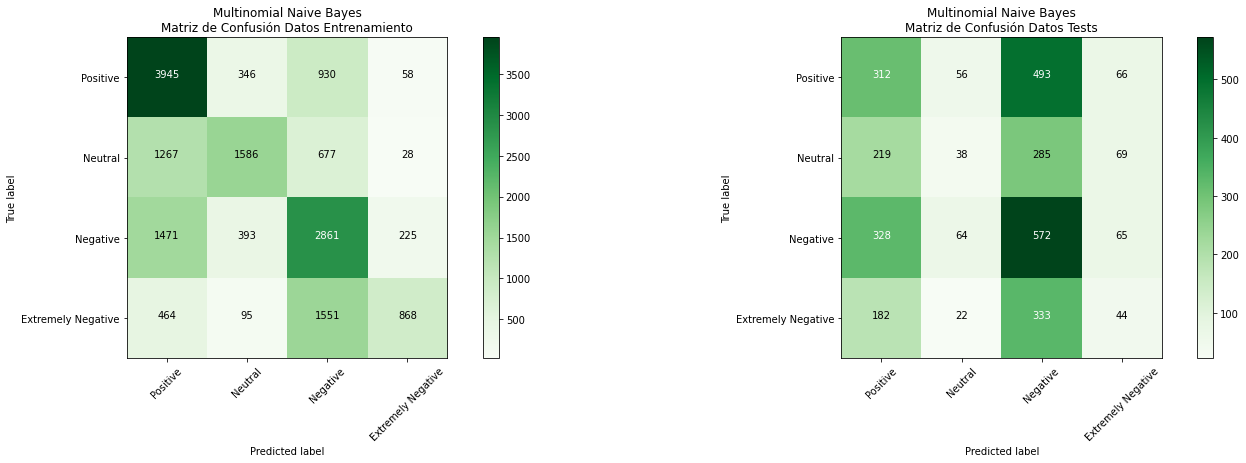

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

polaridad = ['Positive', 'Neutral', 'Negative', 'Extremely Negative']

# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(train_X)
    y_pred_test = v.predict(test_X)
    model['confusion_matrix_train'] = confusion_matrix(y_true = y_train, y_pred = y_pred_train, labels=polaridad)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred = y_pred_test, labels=polaridad)
    msc.append(model)


# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Pintamos las matrices de confusión
plt.figure(figsize=(20, 35))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(6, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=polaridad,
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(6, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=polaridad,
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

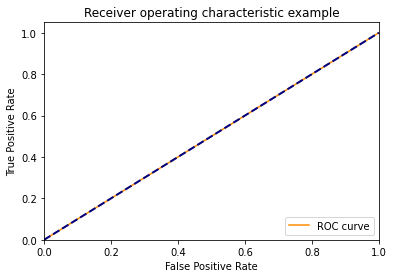

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
['Positive', 'Neutral', 'Negative', 'Extremely Negative']
y_true1=[]
y_pred1=[]
for i in range(len(y_train)):
  if(y_train[i] =='Positive'):
    y_true1.append(1)
  if(y_train[i] =='Negative'):
    y_true1.append(0)

for i in range(len(y_test)):
  if(y_test[i] =='Positive'):
    y_pred1.append(0)

  if(y_test[i] =='Negative'):
    y_pred1.append(0)


y_true2=y_true1[:1988]

fpr, tpr, thresholds = roc_curve(y_true2, y_pred1)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()